In [22]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [23]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_cs = pd.read_csv('census_starter.csv')
df_train.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


pct_bb_[year] - The percentage of households in the county with access to broadband of any type. Derived from ACS table B28002: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD.
cfips - The CFIPS code.
pct_college_[year] - The percent of the population in the county over age 25 with a 4-year college degree. Derived from ACS table S1501: EDUCATIONAL ATTAINMENT.
pct_foreign_born_[year] - The percent of the population in the county born outside of the United States. Derived from ACS table DP02: SELECTED SOCIAL CHARACTERISTICS IN THE UNITED STATES.
pct_it_workers_[year] - The percent of the workforce in the county employed in information related industries. Derived from ACS table S2405: INDUSTRY BY OCCUPATION FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER.
median_hh_inc_[year] - The median household income in the county. Derived from ACS table S1901: INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS).

In [24]:
df_train.describe()

,cfips,microbusiness_density,active
count,122265.000000,122265.000000,1.222650e+05
mean,30376.037640,3.817671,6.442858e+03
std,15143.508721,4.991087,3.304001e+04
min,1001.000000,0.000000,0.000000e+00
25%,18177.000000,1.639344,1.450000e+02
50%,29173.000000,2.586543,4.880000e+02
75%,45077.000000,4.519231,2.124000e+03
max,56045.000000,284.340030,1.167744e+06


<AxesSubplot:xlabel='state'>

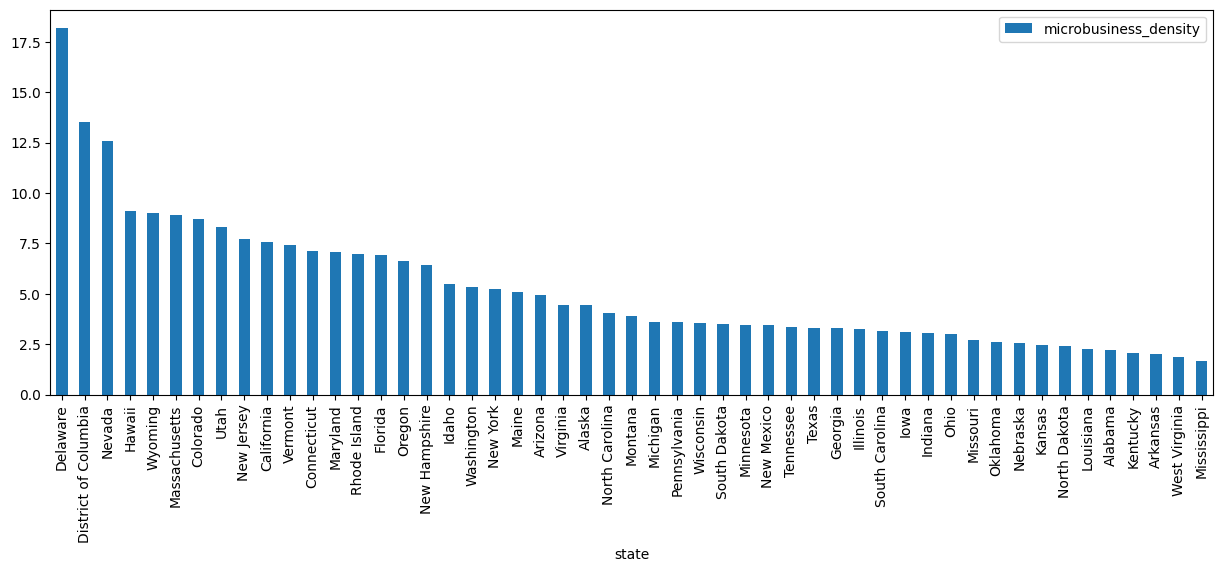

In [38]:
df_train.groupby('state')['microbusiness_density'].mean().to_frame().sort_values('microbusiness_density', ascending = False)
# Visualize above table
df_train.groupby('state')['microbusiness_density'].mean().to_frame().sort_values('microbusiness_density', ascending = False).plot(kind = 'bar', figsize = (15, 5))

In [26]:
pd.merge(df_cs, df_train, 'right', on = 'cfips')

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,pct_foreign_born_2017,pct_foreign_born_2018,pct_foreign_born_2019,pct_foreign_born_2020,pct_foreign_born_2021,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,row_id,county,state,first_day_of_month,microbusiness_density,active
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,16.4,2.1,2.0,2.3,2.3,2.1,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,1001_2019-08-01,Autauga County,Alabama,2019-08-01,3.007682,1249
1,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,16.4,2.1,2.0,2.3,2.3,2.1,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,1001_2019-09-01,Autauga County,Alabama,2019-09-01,2.884870,1198
2,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,16.4,2.1,2.0,2.3,2.3,2.1,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,1001_2019-10-01,Autauga County,Alabama,2019-10-01,3.055843,1269
3,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,16.4,2.1,2.0,2.3,2.3,2.1,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,1001_2019-11-01,Autauga County,Alabama,2019-11-01,2.993233,1243
4,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,16.4,2.1,2.0,2.3,2.3,2.1,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,1001_2019-12-01,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122260,71.1,73.3,76.8,79.7,81.3,56045,14.1,13.5,13.4,12.7,13.9,3.8,4.1,1.7,2.3,1.6,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0,56045_2022-06-01,Weston County,Wyoming,2022-06-01,1.803249,101
122261,71.1,73.3,76.8,79.7,81.3,56045,14.1,13.5,13.4,12.7,13.9,3.8,4.1,1.7,2.3,1.6,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0,56045_2022-07-01,Weston County,Wyoming,2022-07-01,1.803249,101
122262,71.1,73.3,76.8,79.7,81.3,56045,14.1,13.5,13.4,12.7,13.9,3.8,4.1,1.7,2.3,1.6,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0,56045_2022-08-01,Weston County,Wyoming,2022-08-01,1.785395,100
122263,71.1,73.3,76.8,79.7,81.3,56045,14.1,13.5,13.4,12.7,13.9,3.8,4.1,1.7,2.3,1.6,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0,56045_2022-09-01,Weston County,Wyoming,2022-09-01,1.785395,100


In [31]:
# convert df_train['first_day_of_month] to datetime format and extract year from it
df_train['first_day_of_month'] = pd.to_datetime(df_train['first_day_of_month'])
# extract year from first_day_of_month  
df_train['year'] = df_train['first_day_of_month'].dt.year
# Analyze df_train['year'] and df_train['microbusiness_density']
df_train.groupby('year')['microbusiness_density'].mean().to_frame().sort_values('microbusiness_density', ascending = False)

,microbusiness_density
year,
2022,3.946603
2021,3.841160
2019,3.732905
2020,3.722057
